1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


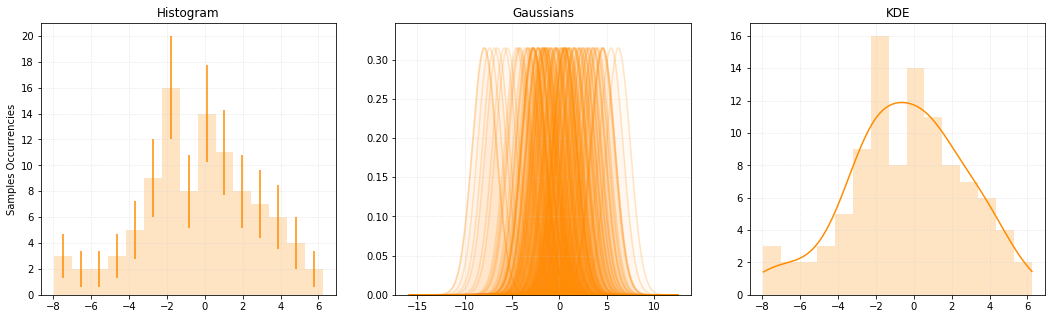

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy import stats
from scipy.integrate import trapz

N = 100
mean = 0
std = 3

sp = np.arange(N)
x = np.random.normal(mean, std, N)


xnorm = stats.norm() 



fig, (ax1, ax2, ax3) = plt.subplots(nrows= 1, ncols=3, figsize=(18,5))

#fig 1
nbins = 15
ax1.grid(color='lightgrey', linestyle=':', linewidth=0.6)
bins = ax1.hist(x, nbins, color='bisque')
yerror = np.sqrt(bins[0])
bins_x = (bins[1][:-1]+bins[1][1:])/2
ax1.errorbar(bins_x, bins[0], yerr=yerror, fmt='none', markersize=8, capsize=0, color='darkorange')
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.set_title('Histogram')
# ax1.set_xlabel("samples value")
ax1.set_ylabel("Samples Occurrencies")

#fig 2
ax2.set_title('Gaussians')
grid = np.linspace(np.min(x)*2, np.max(x)*2, N*2)
default_std = 1.06*std*N**(-1/5)
normal_l = []
ax2.grid(color='lightgrey', linestyle=':', linewidth=0.6)
for sample in x:
    normal = stats.norm.pdf(grid, sample, scale=default_std)
    normal_l.append(normal)
    ax2.plot(grid, normal, color='darkorange', alpha=0.2)
    ax2.fill_between(grid, normal, color='darkorange', alpha=0.03)
ax2.axis(ymin=0, ymax=1.1*np.max(normal))

#fig 3
grid3 = np.linspace(np.min(x), np.max(x), N)
normal_l = []
for sample in x:
    normal = stats.norm.pdf(grid3, sample, scale=default_std)
    normal_l.append(normal)
sog = np.sum(normal_l, axis=0)
# print(sog)
area_sog = trapz(sog, grid3)
# print(area_sog)
area_hist = sum(np.diff(bins[1])*bins[0])
# print(area_hist)
k_norm = area_sog/area_hist
norm_sog = sog/k_norm

ax3.set_title('KDE')
ax3.grid(color='lightgrey', linestyle=':', linewidth=0.6)
ax3.plot(grid3, norm_sog, color='darkorange')
ax3.hist(x, bins=nbins, color='bisque')
ax3.yaxis.tick_left()

    

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

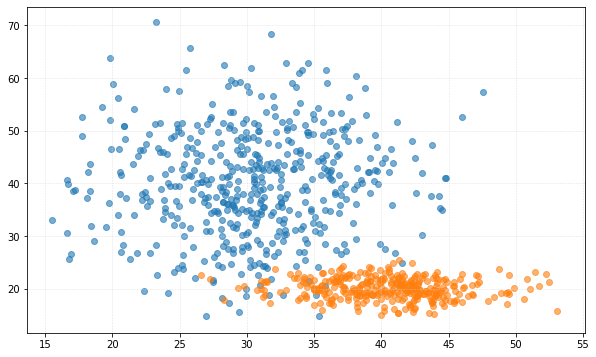

In [2]:
def normal_cluster_gen2D(data):
    """
    data (list): every element in data must be a list of three 
                elements with the mean as 2D array,
                std as 2D array, and number of samples.
    It generate a normal cluster for every element in data
    """  
    def norm2D_generator(mean, std, N):
        x = np.random.normal(mean[0], std[0], N)
        y = np.random.normal(mean[1], std[1], N)
        return x,y

    x = []
    y = []
    for i in range(len(data)):
        xi, yi = norm2D_generator(data[i][0], data[i][1], data[i][2])
        x.append(xi)
        y.append(yi)
    
    return x,y

data = [[(30, 40), [6,10], 500], [(40,20), [5,2], 330]]        
x,y = normal_cluster_gen2D(data)


# x1,y1 = norm2D_generator(mean1, std1, N1)
# x2,y2 = norm2D_generator(mean2, std2, N2)

fig, ax = plt.subplots(figsize=(10,6))
# sns.set_style("darkgrid")
alpha = 0.6
ax.scatter(x[0],y[0], alpha=alpha)
ax.scatter(x[1],y[1], alpha=alpha)
ax.grid(color='lightgrey', linestyle=':', linewidth=0.6)



3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [98]:
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


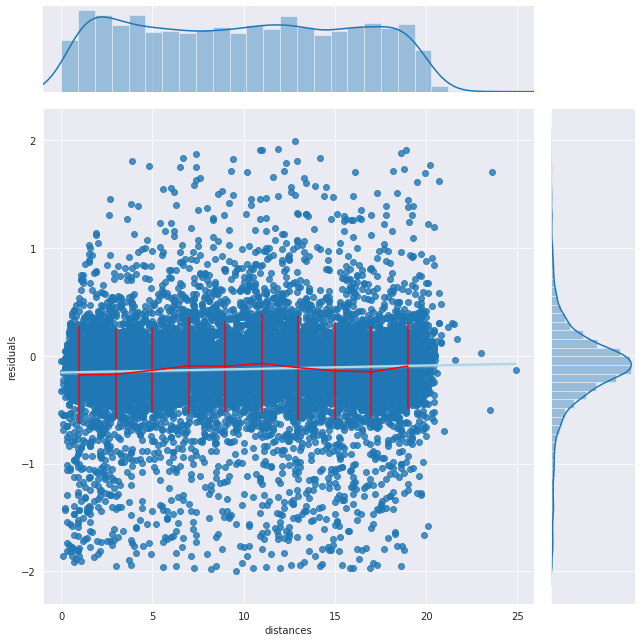

In [5]:
import seaborn as sns

data = np.load("data/residuals_261.npy", allow_pickle=True).item()
df = pd.DataFrame(data)

df = df[df['residuals'] < 2]
df = df[df['residuals'] > -2]

slope, intercept, rvalue, pvalue, stderr = stats.linregress(df['distances'],df['residuals'])

max_d = 20
x = np.zeros([10,])
x_slice = []
for i in range(len(x)):
    bot = (max_d / len(x))*i
    up = (max_d / len(x))*(i+1)
    x_slice.append([])
#     print(bot, up)
    for j in range(len(df)):
        if df.iloc[j,1] >= bot and df.iloc[j,1] < up:
            x_slice[i].append(df.iloc[j,0])
            x[i] +=1
# print(x)
y = np.zeros([10,])
erry = np.zeros([10,])  
for i in range(len(x_slice)):    
    y[i] = sum(x_slice[i]) / len(x_slice[i]) 
    erry[i] = np.std(x_slice[i])
    

center_bin = np.arange(1,20,2)
sns.set_style('darkgrid')
sns.jointplot(height = 9, x='distances', y='residuals', data=df, kind='reg', joint_kws={'line_kws':{'color':'lightblue'}})
plt.xlim([df['distances'].min()-1, df['distances'].max()+1 ])
plt.ylim([df['residuals'].min()-0.3, df['residuals'].max()+0.3])
# plt.title("Distances and residual joint distribution")

plt.errorbar(center_bin, y, yerr=erry, color='red')

#reset the seaborn values
sns.reset_orig()
